In [ ]:
# Checks if all utilized libraries are installed
try:
  import pandas as pd #https://pandas.pydata.org/docs/
  from IPython.display import display #https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
  import nltk #https://www.nltk.org/
  from nltk.corpus import stopwords #https://www.nltk.org/search.html?q=stopwords
  from nltk.stem import PorterStemmer #https://www.nltk.org/howto/stem.html
  import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/pyplot.html
  from wordcloud import WordCloud #https://amueller.github.io/word_cloud/
  from sklearn.feature_extraction.text import TfidfVectorizer #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
  from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
  from sklearn.metrics import classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, GaussianNB #https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
  from sklearn.metrics import ConfusionMatrixDisplay #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
  import numpy as np #https://numpy.org/doc/stable/
  from sklearn.neighbors import KNeighborsClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  from matplotlib.colors import ListedColormap #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
  from sklearn.cluster import KMeans #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  from sklearn.decomposition import PCA #https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  print("All libraries have been imported successfully...")
except:
  !pip install pandas
  !pip install IPython
  !pip install nltk
  !pip install matplotlib
  !pip install wordcloud
  !pip install sklearn
  !pip install numpy
  print("Some libraries are not found, installing...")

All libraries have been imported successfully...


# Normalizing and transforming the data

The data sets used throughout this project are linked below:   

https://archive.ics.uci.edu/dataset/228/sms+spam+collection
(This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.)

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/
(This is an alternative site to download the same dataset as above. I used the CSV file here for simpler data extraction)

After importing the datasets above, I began to normalize the dataset, removing any null entries, and reformatting the raw dataset to have two attributes: the first identifying whether an SMS message is spam or ham and the second being the actual message received by a user. After converting the spam / ham attribute values into a corresponding binary value, I began standardizing the messages so the ML algorithm could efficiently analyze them. This was accomplished by using the Natural Language Toolkit (NLTK) library to tokenize the messages into a list of words, removing punctuation, removing stopwords, and stemming words from the messages. Stopwords are words commonly used in speech and provide little to no analytical value – words like “the” or “and”. Stemming is the act of removing the suffixes of words so only the root words are left – like turning “texting” to “text”. After this was accomplished, I concatenated the resulting words into sentences (converted_sentences)

In [ ]:
import pandas as pd #https://pandas.pydata.org/docs/
from IPython.display import display #https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html

# Imports the raw CSV file as a dataframe object using pandas
raw_df = pd.read_csv("spam.csv", encoding='latin-1')
clean_df = raw_df

display(raw_df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Removes extraneous and null data points
clean_df = clean_df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()
clean_df.rename(columns={'v1':'Target', 'v2':'Message'},inplace=True)

display(clean_df.head())

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Changes the outcome value from "spam" and "ham" to a binary value ("ham" = 0 AND "spam" = 1)
def valueConversion(Target_value):
  if (Target_value == "ham"):
    return 0
  elif (Target_value == "spam"):
    return 1
  else:
    return None

clean_df["Target"] = clean_df["Target"].apply(valueConversion)

display(clean_df.head())

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk #https://www.nltk.org/
nltk.download('punkt')
from nltk.corpus import stopwords #https://www.nltk.org/search.html?q=stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer #https://www.nltk.org/howto/stem.html

def sentConversion(text):
  text = text.lower()   # Makes all letters lowercase
  text = nltk.word_tokenize(text)   # Separates the given sentence by word and punctuation

  # Removes punctuation values in the list including parenthesis, periods, commas, ampersands
  temp_list = []
  for string in text:
    if string.isalnum() == True :
      temp_list.append(string)
  text = temp_list

  # Removing stopwords from the sentence which are commonly used words like "the" "a" "and"
  temp_list = []
  for string in text:
    if string not in stopwords.words('english'):
      temp_list.append(string)
  text = temp_list

  # Stemming words from the sentence which is basically removing suffixes to get the root word (messaging -> messag OR programmer -> programm)
  ps = PorterStemmer()
  temp_list = []
  for string in text:
    temp_list.append(ps.stem(string))
  text = temp_list

  return " ".join(text)

clean_df["Converted Message"] = clean_df["Message"].apply(sentConversion)

clean_df.to_csv('spamCleaned.csv', index=False) #Outputs the cleaned dataframe to a CSV file

display(clean_df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Target,Message,Converted Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


# Preliminary Analysis

Before I start to analyze the data, it's helpful if I conducted a preliminary analysis to see if I can draw any conclusions. I can use a word cloud of the words found in spam messages, seeing which words occur most often. I can run a similar process for ham messages. With these two lists, I can ommit any words that appear commonly in both spam and ham messages. The resulting list of *top_spam_words* is then representative of the most common words used in spam messages.

This preliminary analysis is really helpful because it conducts a process similarly used by TF-IDF. When I use TF-IDF later, people can better grasp how the vectorization process works. The process done in the preliminary analysis phase breaks down TF-IDF vectorization in a more understable way.

Text(0.5, 1.0, 'Percentage of spam/ham messages')

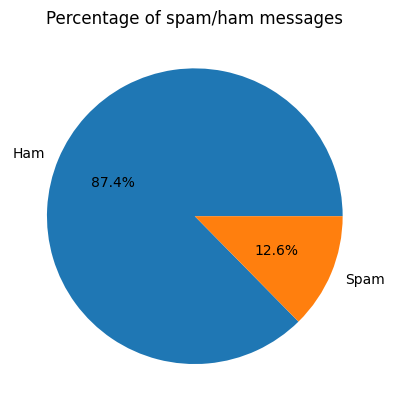

In [ ]:
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/pyplot.html

# Creates a pie graph of the occurances of spam and ham messages
plt.pie(clean_df['Target'].value_counts(), labels = ['Ham', 'Spam'], autopct='%0.1f%%')
plt.title("Percentage of spam/ham messages")

Top reoccurring text in spam text messages:
1. free
2. call
3. text
4. u
5. txt
6. mobil
7. repli
8. c
9. ur
10. tone
11. stop
12. send
13. new
14. pleas call
15. messag
16. win
17. go
18. claim
19. chat
20. msg




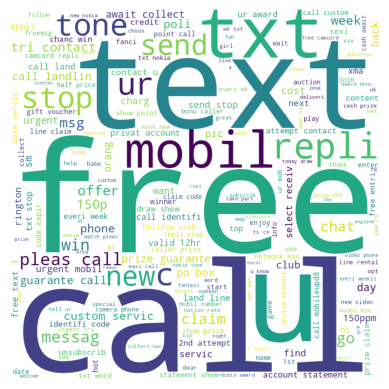

In [ ]:
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/pyplot.html
from wordcloud import WordCloud #https://amueller.github.io/word_cloud/

# Creates a word cloud, showing how often do certain words appear in spam messages
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10)
spam_wc = wordcloud.generate(clean_df[clean_df["Target"]==1]["Converted Message"].str.cat(sep = " "))
plt.axis("off")
plt.imshow(spam_wc)

# Prints the words that occur the most in spam messages
print("Top reoccurring text in spam text messages:")
spam_words = list(wordcloud.words_.keys())
top20_spam_words = []
for key in range(20):
  top20_spam_words.append(spam_words[key])
  print(str(key+1) + ". " + spam_words[key])
print("\n")

Top reoccurring text in ham text messages:
1. u
2. go
3. lt gt
4. come
5. got
6. love
7. call
8. ok
9. time
10. ur
11. want
12. know
13. need
14. one
15. think
16. good
17. see
18. still
19. day
20. da




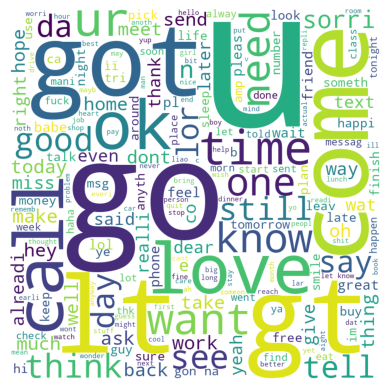

In [ ]:
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/pyplot.html
from wordcloud import WordCloud #https://amueller.github.io/word_cloud/

# Creates a word cloud, showing how often do certain words appear in spam messages
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10)
ham_wc = wordcloud.generate(clean_df[clean_df["Target"]==0]["Converted Message"].str.cat(sep = " "))
plt.axis("off")
plt.imshow(ham_wc)

# Prints the words that occur the most in ham messages
print("Top reoccurring text in ham text messages:")
ham_words = list(wordcloud.words_.keys())
top20_ham_words = []
for key in range(20):
  top20_ham_words.append(ham_words[key])
  print(str(key+1) + ". " + ham_words[key])
print("\n")

In [ ]:
# Creates a list of words that occure the most in both ham and spam messages
common_words = [word for word in top20_spam_words if word in top20_ham_words]
print("These are the most reoccurring words that appear in both spam and ham messages:\n" + str(common_words))

These are the most reoccurring words that appear in both spam and ham messages:
['call', 'u', 'ur', 'go']


In [ ]:
# Creates a list of words that occur in spam messages but not in ham messages
top_spam_words = top20_spam_words[:]
for word in common_words:
  top_spam_words.remove(word)
print("These are the most reoccurring words in spam messages with intersecting ham words removed:\n" + str(top_spam_words))

These are the most reoccurring words in spam messages with intersecting ham words removed:
['free', 'text', 'txt', 'mobil', 'repli', 'c', 'tone', 'stop', 'send', 'new', 'pleas call', 'messag', 'win', 'claim', 'chat', 'msg']


# Setting up the training data

To create the training data, I used Term Frequency - Inverse Document Frequency (TF-IDF) which measures the amount of times a word appears in a text while measuring how important a word is across multiple texts. When the sentences are vectorized, every unique word is set as a feature, and each sentence is an array. The TF-IDF vector (X) has many zeroes because the specific term doesn't appear in the sentence, as the vector is comparing all unique words in the dataset to the sentence.

After I have the input features (X) and the target values (y), I split them into training data (X_train and y_train) and testing data (y_train and y_test) in a 80:20 split. After I split the data, I am ready to begin training the ML algorithms.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(clean_df['Converted Message']).toarray()
y = clean_df['Target']

print("Printing the outputted vector of the Term Frequency - Inverse Document Frequency (TF-IDF):")
print(X)
print("\nPrinting the spam / ham target list:")
print(y)

Printing the outputted vector of the Term Frequency - Inverse Document Frequency (TF-IDF):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Printing the spam / ham target list:
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

print("The shape of the training data is: \n(test-size, features)")
X_train.shape

The shape of the training data is: 
(test-size, features)


(4135, 3000)

# The ML Algorithm (Naive-Bayes)

Naive-Bayes is the machine learning algorithm I will employ in the project. It is a supervised learning model that operates by gathering the analyzing an input of labeled email messages (the vectorized *converted_sentences*) and calculating the probability of each word appearing in spam and ham messages. When given a message, a Naive-Bayes algorithm would view each word as an independent feature that can influence the type of message that is received. From this, the algorithm would compile the calculations from all the features (or words) and output its decision whether a message is spam or ham.

There are several types of Naive-Bayes algorithms -- like Multinomial or Bernoulli -- and I will analyze each of them to see which is more accurate.

Printing classification report for MultinomialNB():
              precision    recall  f1-score   support

         Ham    0.97219   0.99890   0.98537       910
        Spam    0.98990   0.79032   0.87892       124

    accuracy                        0.97389      1034
   macro avg    0.98105   0.89461   0.93214      1034
weighted avg    0.97432   0.97389   0.97260      1034



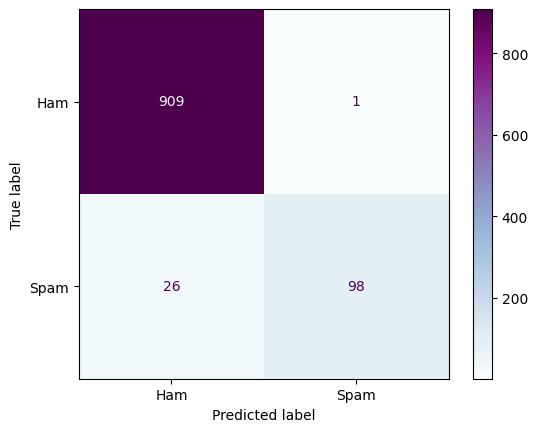

In [ ]:
from sklearn.metrics import classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, GaussianNB #https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
from sklearn.metrics import ConfusionMatrixDisplay #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

MultiNB = MultinomialNB()
BernNB = BernoulliNB()
CompNB = ComplementNB()
GausNB = GaussianNB()

# A method used to train the inputted Naive-Bayes algorithm. A test is run using the trained ML model, and the results are printed.
def training_and_testing_model(NB):
  # Training and testing the algorithms
  NB.fit(X_train, y_train)
  y_predict = NB.predict(X_test)

  # Prints the classification report that contains precision,  f1-score, and accuracy
  print (f'Printing classification report for {NB}:')
  print(classification_report(y_test, y_predict, target_names=['Ham','Spam'], digits=5))

  # Prints the confusion matrix that shows number of true predictions and false predictions
  ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=['Ham', 'Spam'], cmap='BuPu')
  plt.show()


# MultinominalNB is an algorithm that meausres how frequently each feature (word) appears in a sentence in the context of the dataset
training_and_testing_model(MultiNB)

Printing classification report for BernoulliNB():
              precision    recall  f1-score   support

         Ham    0.98588   0.99780   0.99181       910
        Spam    0.98230   0.89516   0.93671       124

    accuracy                        0.98549      1034
   macro avg    0.98409   0.94648   0.96426      1034
weighted avg    0.98546   0.98549   0.98520      1034



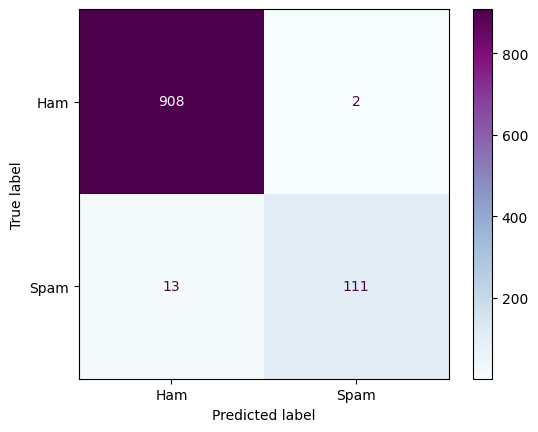

In [ ]:
# BernoulliNB is an algorithm that meausres whether each feature (word) is present or absent in a sentence in the context of the dataset
training_and_testing_model(BernNB)

Printing classification report for ComplementNB():
              precision    recall  f1-score   support

         Ham    0.99416   0.93516   0.96376       910
        Spam    0.66854   0.95968   0.78808       124

    accuracy                        0.93810      1034
   macro avg    0.83135   0.94742   0.87592      1034
weighted avg    0.95511   0.93810   0.94269      1034



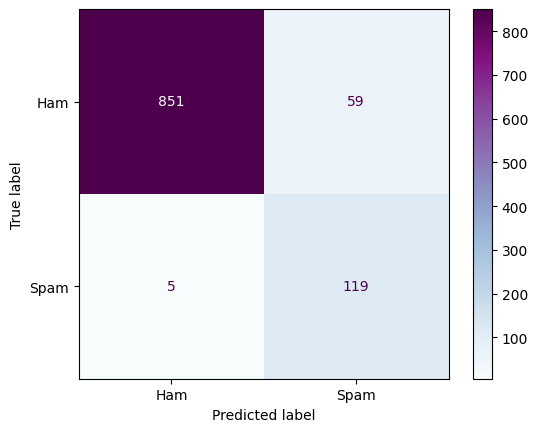

In [ ]:
# GaussianNB is an algorithm that assumes the distribution of values from the vectorized text (TF-IDF) is skewed
# it also focuses on how a feature is dissimilar to messages in other classes
training_and_testing_model(CompNB)

Printing classification report for GaussianNB():
              precision    recall  f1-score   support

         Ham    0.97625   0.85824   0.91345       910
        Spam    0.44872   0.84677   0.58659       124

    accuracy                        0.85687      1034
   macro avg    0.71248   0.85251   0.75002      1034
weighted avg    0.91299   0.85687   0.87425      1034



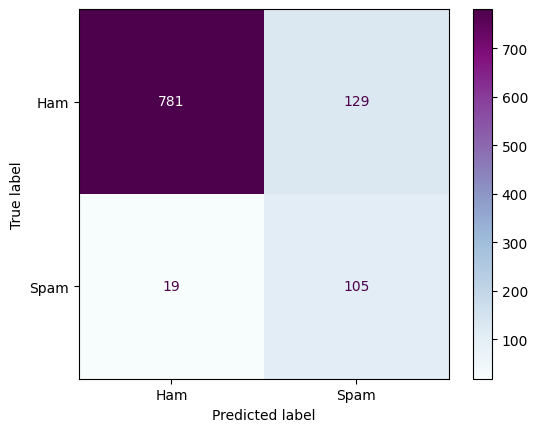

In [ ]:
# GaussianNB is an algorithm that assumes the distribution of values from the vectorized text (TF-IDF) is normal
training_and_testing_model(GausNB)

**Results**

Across all the Naive-Bayes models, Bernoulli Naive-Bayes appears to be the best fitting model at identifying whether a message is spam or ham. This is seen in both the increased accuracy (98.549 %) and the confusion matrix having less false predictions (15) compared to the other models.

Bernoulli's algorithm meausres whether each feature from the TF-IDF vector is present or absent in a sentence within the context of the dataset. This method is somewhat similar to the method I used in preliminary analysis, where I decided which words in spam messages are commonly occurring and are indicators for message classification.

**Post Analysis (Naive-Bayes)**

Below, I printed the features / words that the Bernoulli's ML algorithm believes are indicators used to classify messages as spam or ham. Following this, I printed the words that most commonly appear in spam and ham messages. At a glance, we can compare the two difference lists and see that most of the features (or words) used by the Bernoulli's ML algorithm also appeared in the preliminary analysis. This post analysis allows us to better understand how the Naive-Bayes ML algorithms classify messages as spam or ham.

In [ ]:
import numpy as np #https://numpy.org/doc/stable/
from sklearn.feature_extraction.text import TfidfVectorizer #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# Takes the probability calculations used by Bernoulli NB and sorts them in descending order,
# placing the words that most affect ham/spam classification in the beginnning
spam_prob_sorted = BernNB.feature_log_prob_[1, :].argsort()[::-1]
ham_prob_sorted = BernNB.feature_log_prob_[0, :].argsort()[::-1]

# Using the sorted list above, numpy gets the features (or words) that correspond to the probability list
BernBN_ham_words = np.take(vectorizer.get_feature_names_out(), ham_prob_sorted)
BernBN_spam_words = np.take(vectorizer.get_feature_names_out(), spam_prob_sorted)

print("\nCommon ham features according to Bernoulli NB model:\n"+
      str(BernBN_ham_words[:10]))
print("\nCommon spam features according to Bernoulli NB model:\n"+
      str(BernBN_spam_words[:10])+"\n")

print("\nCommon ham features according to preliminary analysis:\n"+
      str(ham_words[:10]))
print("\nCommon spam features according to preliminary analysis:\n"+
      str(spam_words[:10]))


Common ham features according to Bernoulli NB model:
['go' 'get' 'come' 'know' 'got' 'like' 'gt' 'ok' 'lt' 'call']

Common spam features according to Bernoulli NB model:
['call' 'free' 'txt' 'text' 'mobil' 'ur' 'repli' 'stop' 'claim' 'prize']


Common ham features according to preliminary analysis:
['u', 'go', 'lt gt', 'come', 'got', 'love', 'call', 'ok', 'time', 'ur']

Common spam features according to preliminary analysis:
['free', 'call', 'text', 'u', 'txt', 'mobil', 'repli', 'c', 'ur', 'tone']


# The ML Algorithm (K-Nearest Neighbor)
K-Nearest Neighbor (K-NN) is a supervised machine learning algorithm that works by creating clusters based on the TF-IDF training data, and for this project there would only be a cluster for spam and another for ham messages. A testing datapoint would then be inputted, and the algorithm would calculate the distance to the nearest cluster of training datapoints to similarly label the testing datapoint. The library I used calculates this distance using the Minkowski equation with p=2, which translates to Euclidean distance metrics.

In the actual K-NN model, I used all 3000 features from TF-IDF in the training and testing phases. In order to graph the data, I used Principle Component Analysis (PCA) to reduce the dimensionality of the inputted vectorized dataset to two dimensions. This reduction retains the variation and patterns of the data, so the most important information is still retained. It's impossible to create a graph that takes 3000 features as inputs, so PCA filters the disruptive noise from the inputted vectorized dataset.

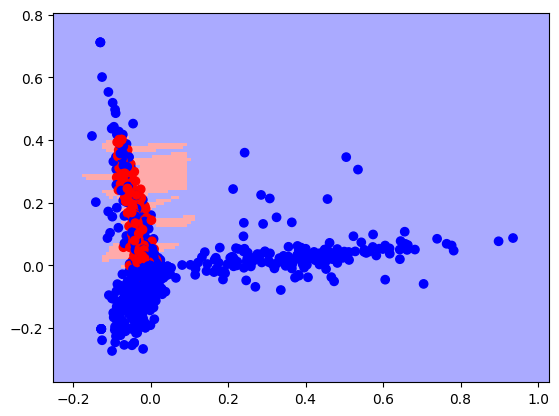

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
import numpy as np #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/pyplot.html
from matplotlib.colors import ListedColormap #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html

# Running PCA to reduce the features in the training data from 3000 to a graphable 2 features
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_train)
h = .01  #the step-size used in the background mesh

# Creating a K-NN algorithm that uses the reduced vectorized training data (proficed by PCA)
knngraph = KNeighborsClassifier(n_neighbors=1)
knngraph.fit(reduced_X, y_train)

# Begin graphing the decision boundry by assigning each point in the mesh a color
x_min, x_max = reduced_X[:,0].min() - 0.1, reduced_X[:,0].max() + 0.1
y_min, y_max = reduced_X[:,1].min() - 0.1, reduced_X[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knngraph.predict(np.c_[xx.ravel(), yy.ravel()])

# Actually graphing the decision boundry used by the K-NN algorithm
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))

# Graphing the training points over the decision boundry mesh
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_train, cmap=ListedColormap(['#0000FF', '#FF0000']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Creating a K-Nearest Neighbor ML algorithm that takes vectorized TF-IDF training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Testing the K-Nearest Neighbors model and printing the results
y_predict = knn.predict(X_test)
print(classification_report(y_test, y_predict, target_names=['Ham','Spam'], digits=5))

              precision    recall  f1-score   support

         Ham    0.94792   1.00000   0.97326       910
        Spam    1.00000   0.59677   0.74747       124

    accuracy                        0.95164      1034
   macro avg    0.97396   0.79839   0.86037      1034
weighted avg    0.95416   0.95164   0.94619      1034



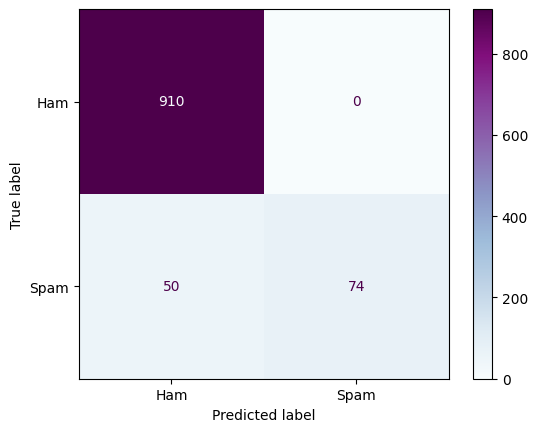

In [ ]:
# Creates a confusion matrix that displays the number of true predictions and false predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=['Ham', 'Spam'], cmap='BuPu')
plt.show()

Results


The K-Nearest Neighbor learning algorithm performed highly at an accuracy of 95.164 %. The confusion matrix revealed there were 50 false predictions, and that all of them were predicted to be ham but were spam in actuality. It almost performed as well as Bernoulli's Naive-Bayes algorithm, but the increased number of false negatives leaves much to be desired. Overall, KNN was a good ML indicator for spam and ham messages.

# The ML Algorithm (K-Means Clustering)

K-Means is a machine learning algorithm that I will use to get alternative results. It is an unsupervised learning model that operates by taking the inputted TF-IDF vectors and separating the data into two different clusters, each with similar data. In theory, spam and ham messages have different semantics and use different words, so the vectors of these messages would naturally separate and create two different clusters. The K-Means algorithm would pick up on this difference, creating an algorithm that can determine whether a message is spam or ham.

In the actual K-Means algorithm, I used all 3000 features by TF-IDF. For graphing purposes, I used Principle Component Analysis (PCA) to reduce the dimensionality of the inputted vectorized dataset to two dimensions. This reduction retains the variation and patterns of the data, so the most important information is still retained. It's impossible to create a graph that takes 3000 features as inputs, so PCA filters the disruptive noise from the inputted vectorized dataset.

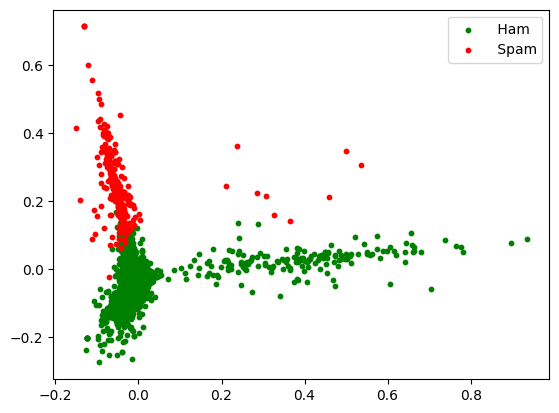



              precision    recall  f1-score   support

         Ham    0.92616   0.96484   0.94510       910
        Spam    0.62791   0.43548   0.51429       124

    accuracy                        0.90135      1034
   macro avg    0.77703   0.70016   0.72969      1034
weighted avg    0.89039   0.90135   0.89344      1034



In [ ]:
from sklearn.cluster import KMeans #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.decomposition import PCA #https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/pyplot.html

# Creating a K-means ML algorithm that clusters the vectorized TF-IDF training data
kmeans = KMeans(n_clusters=2, n_init=10, random_state=20)
kmeans.fit(X_train)

# Principle Component Analysis (PCA) reduces the dimensionality of a dataset while retaining the variation and pattern (used for graphing)
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_train)

# Creating a scatterplot showing the clustered dataset
colors = ['green', 'red']
cluster = ['Ham','Spam']
for i in range(2):
    plt.scatter(reduced_X[kmeans.labels_ == i, 0], reduced_X[kmeans.labels_ == i, 1],
                s=10, color=colors[i], label=f' {cluster[i]}')
plt.legend()
plt.show()

# Testing the K-means model and printing the results
y_predict = kmeans.predict(X_test)
print('\n')
print(classification_report(y_test, y_predict, target_names=['Ham','Spam'], digits=5))

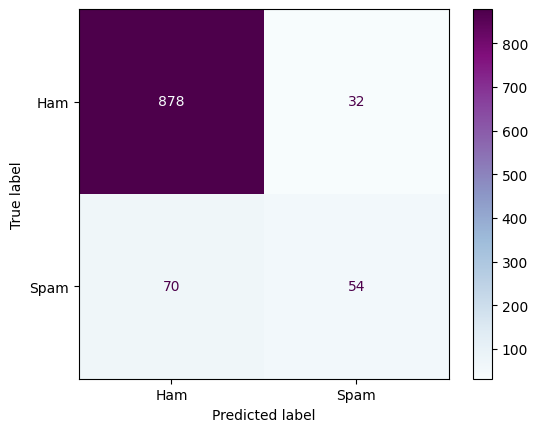

In [ ]:
# Creates a confusion matrix that displays the number of true predictions and false predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=['Ham', 'Spam'], cmap='BuPu')
plt.show()

**Results**

The K-means learning algorithm performed relatively well. Because the placement of the centroids are randomly placed in the training phase, the results of the model can vary. The highest accuracy was 90.135 % with the clustered data being shown above. The confusion matrix shows false predictions occurred 102 times. Overall, the K-means algorithm performed worse than Bernoulli's Naive-Bayes and K-Nearest Neighbor algorithms, but this is to be expected. K-means is an unsupervised ML algorithm, meaning conclusions have to be drawn without any confirmation. While the accuracy of the K-means tests were lower than the the other supervised algorithms, the 90.135 % accuracy demonstrates there is a distinction between spam and ham messages.

# Post Analysis
After running all the ML algorithms, I compiled all the false predictions made by the Bernoulli's Naive-Bayes, the K-Nearest Neighbor, and the K-Means algorithm. Since the data was shuffled when I split the data into training and testing, I had to create a list of the message data by iterating through the indicies used in the testing data. Then, I created a method *getFalsePredictions* that creates a dataframe of an inputted algorithm's false predictions. This method was then run on the Bernoulli's Naive-Bayes, the K-Nearest Neighbor, and the K-Means algorithm and the three dataframes were concatenated together. The final dataframe is outputted into the file  

In [ ]:
# These lists compile the message data used by the ML algorithms in the testing phase
testConvertedMessages = []
testRawMessages = []

for I in y_test.index:
  testConvertedMessages.append(clean_df[['Converted Message']].loc[I].values[0])
  testRawMessages.append(clean_df[['Message']].loc[I].values[0])

In [ ]:
import pandas as pd #https://pandas.pydata.org/docs/

# A method that takes in a ML algorithm as an input and returns a dataframe of the algorithm's false predictions
def getFalsePredictions(ML):

  # These varables are a list of binary values that represent the algorithm's target and prediction values
  prediction = ML.predict(X_test)
  target = y_test

  data = []
  ind = 0
  for iteration in target != prediction: #Compares all the target and prediction values
    if iteration == True: #Detects if a false prediction has been made
      row = []

      # Adds the Target, Prediction, and Type of Error columns in the dataframe
      if prediction[ind] == 1:
        row.append("Ham")
        row.append("Spam")
        row.append("False Positive")
      else:
        row.append("Spam")
        row.append("Ham")
        row.append("False Negative")

      row.append(f"{ML}") #Adds the ML Model column
      row.append(testRawMessages[ind]) #Adds the Raw Message column
      row.append(testConvertedMessages[ind]) #Adds the Converted Message column
      data.append(row)
    ind += 1

  # Creates and returns the dataframe
  MLfalsePredictions_df = pd.DataFrame(data, columns=['Target', 'Prediction', 'Type of Error',
                                                      'ML Model', 'Raw Message', 'Converted Message'])
  return MLfalsePredictions_df

# Compiles all the false predictions from the Bernoulli's Naive-Bayes algorithm and the K-Means algorithm
falsePredictions_df = pd.concat([getFalsePredictions(BernNB), getFalsePredictions(knn), getFalsePredictions(kmeans)])

In [ ]:
falsePredictions_df.to_csv('falsePredictions.csv', index=False) #Outputs the cleaned dataframe to a CSV file
display(falsePredictions_df.head())

,Target,Prediction,Type of Error,ML Model,Raw Message,Converted Message
0,Spam,Ham,False Negative,BernoulliNB(),You have 1 new message. Please call 08718738034.,1 new messag pleas call 08718738034
1,Spam,Ham,False Negative,BernoulliNB(),Monthly password for wap. mobsi.com is 391784....,monthli password wap use wap phone pc
2,Spam,Ham,False Negative,BernoulliNB(),"accordingly. I repeat, just text the word ok o...",accordingli repeat text word ok mobil phone send
3,Spam,Ham,False Negative,BernoulliNB(),Email AlertFrom: Jeri StewartSize: 2KBSubject:...,email alertfrom jeri stewarts 2kbsubject presc...
4,Spam,Ham,False Negative,BernoulliNB(),Santa Calling! Would your little ones like a c...,santa call would littl one like call santa xma...


To summarize the *falsePredictions* dataframe, Bernoulli's Naive-Bayes algorithm had 15 false predictions (13 false ham predictions and 2 false spam predictions). K-Nearest Neighbor algorithm had 50 false predictions (all 50 being false ham predictions). K-Means algorithm had 102 false predictions (70 false ham predictions and 32 false spam predictions)